# Analiza osebnih avtomobilov v Sloveniji

## Seznam članov:
* Nejc Ačkun
* Jernej Leskovšek


## Podatki in predprocesiranje
Odločila sva se, da bova kot najino zbirko podatkov uporabila evidenco vseh registriranih vozil v Sloveniji. Podatke se lahko najde tukaj: https://podatki.gov.si/dataset/evidenca-registriranih-vozil-presek-stanja.

Zbirka je sestavljena iz približno 2 milijona elementov. Mislila sva, da je zbirka že omejena na avtomobile, ampak zbirka vsebuje VSA vozila v Sloveniji, in vključuje:
 * Motorna kolesa
 * Delovne stroje
 * Dvigala
 * Traktorje
 * Priklopnike itd.
 
Odločila sva se, da se bova omejila samo na avtomobile. Oba naju zanimajo avtomobili, in sklepava, da bova tako lahko tudi lažje potrdila dobljene rezultate oz. lažje opazila napake in posebnosti, ki bi se lahko pojavile.

Zbirka podatkov vsebuje stolpec z imenom "J-Kategorija in vrsta vozila (opis)", s katerim sva enostavno filtrirala celotno zbirko.


# Nekaj osnovnih statistik

V Sloveniji je registriranih 1.220.811 osebnih vozil.

Če vzamemo populacijo Republike Slovenije, ki je po poročanju statističnega urada 2.080.908 (splošno za leto 2018), vidimo da ima približno vsak 1.7045 Slovenec osebno vozilo. 

Ampak že pri prvem grafu, prikazanemu spodaj, lahko vidimo, da takšnega zaključka nikakor ne smemo narediti.

Trenutna porazdelitev znamk zgleda takole:

In [1]:
%store -r porazdelitevZnamkSkoziLeta

import operator
import matplotlib.pyplot as plt
import numpy as np

sorted_znamke = sorted(porazdelitevZnamkSkoziLeta["2018"].items(), key=operator.itemgetter(1), reverse=True)[:20]

znamke = []
stevilo = []

for line in sorted_znamke:
    znamke.append(line[0])
    stevilo.append(line[1])
    
# this is for plotting purpose
index = np.arange(len(znamke))
plt.figure(figsize=(15,7))
plt.bar(index, stevilo)
plt.xlabel('Znamka', fontsize=10)
plt.ylabel('Št. avtov', fontsize=10)
plt.xticks(index, znamke, fontsize=10, rotation=70)
plt.title('Število registriranih avtomobilov po znamkah - 2018')
plt.show()    


<Figure size 1500x700 with 1 Axes>

Opazimo zanimiv rezultat. Znamki **RENAULT** in **VOLKSWAGEN** sta DALEČ pred tretjim mestom, znamko **OPEL**. Sklepama da zato, ker sta **RENAULT** in **VOLKSWAGEN** velika ponudnika raznih komercialnih vozil in kombijev, ki se, po najinih virih, štejejo uradno kot osebna vozila. Veliko večjih slovenskih podjetji (npr. *Pošta Slovenije*) ima vozni park sestavljen večinoma iz večjih znamk, kot so **RENAULT**. Meniva, da je to povzročilo zgornjo anomalijo.

### Zanimivosti - splošna zbirka podatkov

V Sloveniji je registriranih 5 **neprebojnih vozil**. Štiri od teh vozil so registrirane pri pravnih osebah, eno vozilo, Mercedes-Benz razred S, letnik 2004, pa je, presenetljivo, v zasebni lasti 36 letnega uporabnika iz Ljubljane.

**Najstarejša zabeležena registracija** je za vozilo FIAT 1100, letnik izdelave 1951. Registracija se je zgodila davnega leta 1959.

# Popularnost znamk skozi leta

V tem segmetnu sva poskušala prikazati vplive raznih gospodarskih in političnih sprememb na populacijo avtomobilov.

## Dieselgate

V letu 2014 je več svtovnih študij ugotovilo, da podjetje **VOLKSWAGEN** že več let uporablja naprave na njihovih TDI dizelskih motorjih za ponarejanje rezultatov o emisijah NOx. To je povzročilo masivne tožbe proti podjetju, večina člankov na to temo pa je omenjala tudi "nepopravljivo" škodo za ugled znamke **VOLKSWAGEN** po celem svetu. Kaj na to "nepopravljivo" škodo pravijo naši podatki?

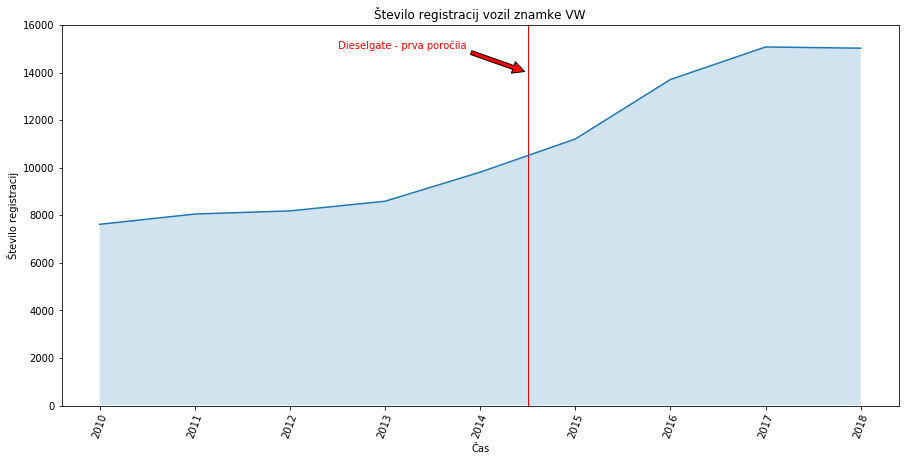

In [2]:
%store -r registracijeZnamkNaLeto
%store -r registracijeNaLeto

registracijeVW = []
registracijeTotal = []
registracijeVWPercent = []
labels = []


for i in range(2010, 2019):
    labels.append(i)
    
    registracijeTotal.append(registracijeNaLeto[str(i) +" zima"]+registracijeNaLeto[str(i) +" poletje"])
    registracijeVW.append(registracijeZnamkNaLeto[str(i)]["VOLKSWAGEN"])    
    registracijeVWPercent.append(registracijeVW[-1]/registracijeTotal[-1])
    
index = np.arange(len(registracijeVW))
plt.figure(figsize=(15,7))
plt.plot(index, registracijeVW)

plt.title('Število registracij vozil znamke VW')
plt.xlabel('Čas', fontsize=10)
plt.ylabel('Število registracij', fontsize=10)

plt.ylim(top=16000, bottom=0)
plt.xticks(index, labels, fontsize=10, rotation=70)
plt.fill_between(index, 0, registracijeVW, alpha=0.2)

plt.fill_between([4.5], [0], [16000], color="r")
plt.annotate("Dieselgate - prva poročila", xy=(4.5, 14000), xytext=(2.5, 15000), color="r", arrowprops=dict(facecolor='red', shrink=0.05))

plt.show() 

Še z odstotki...

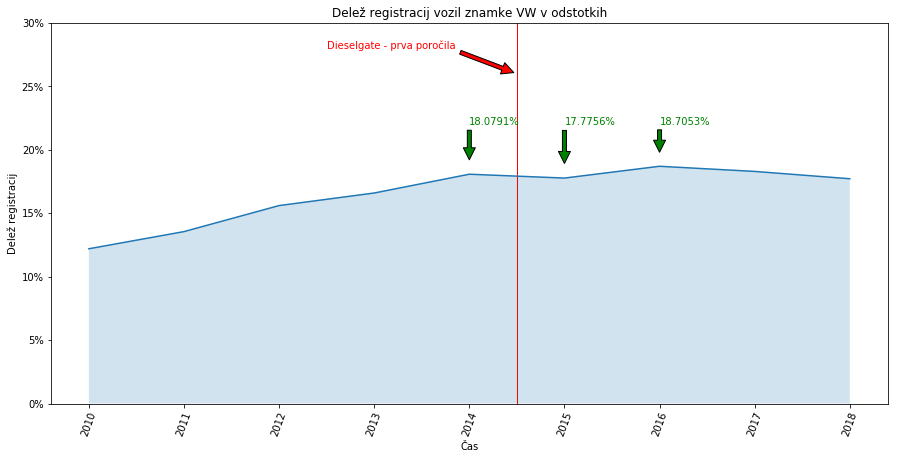

In [3]:
index = np.arange(len(registracijeVWPercent))
plt.figure(figsize=(15,7))
plt.plot(index, registracijeVWPercent)

plt.title('Delež registracij vozil znamke VW v odstotkih')
plt.xlabel('Čas', fontsize=10)
plt.ylabel('Delež registracij', fontsize=10)

plt.ylim(top=0.3,bottom=0)
plt.xticks(index, labels, fontsize=10, rotation=70)
plt.yticks(np.arange(0.00,0.301,0.05), ["0%", "5%","10%","15%","20%","25%","30%"])
plt.fill_between(index, 0, registracijeVWPercent, alpha=0.2)

plt.fill_between([4.5], [0], [0.3], color="r")
plt.annotate("Dieselgate - prva poročila", xy=(4.5, 0.26), xytext=(2.5, 0.28), color="r", arrowprops=dict(facecolor='red', shrink=0.05),)

plt.annotate(str(registracijeVWPercent[4]*100)[:7]+"%", xy=(4, registracijeVWPercent[4]+0.01), xytext=(4, 0.2+0.02), color="g", arrowprops=dict(facecolor='g', shrink=0.05),)
plt.annotate(str(registracijeVWPercent[5]*100)[:7]+"%", xy=(5, registracijeVWPercent[5]+0.01), xytext=(5, 0.2+0.02), color="g", arrowprops=dict(facecolor='g', shrink=0.05),)
plt.annotate(str(registracijeVWPercent[6]*100)[:7]+"%", xy=(6, registracijeVWPercent[6]+0.01), xytext=(6, 0.2+0.02), color="g", arrowprops=dict(facecolor='g', shrink=0.05),)


plt.show()

Kaj lahko razberemo? No ja, ~~"nepopravljive"~~ škode ni, in je verjetno tudi ne bo. Vidimo lahko da prve registracije (kar lahko skoraj enačimo z prodajo) v  letu 2015 res upadejo v primerjavi z letom 2014, ko so bile objavljene prve raziskave VW motorjev. Ampak gre za spremembo **velikosti 0.05%**. Če povemo s številkami je to **9813/54278** registriranih avtomobilov v 2014 in **11207/63047** registriranih avtomobilov v 2015.

Že v letu 2016 pa prve registracije že narastejo nad delež, ki ga zaledimo pred "Dieselgate-om". Na prikazu števila registracij vidimo strm vzpon novih registraciji, kljub škandalu.

Razlogov za to je več. Po eni strani, da, javnost verjetno ni bila tako prizadeta kot bi mogoče morala biti nad škandalom. 

Ampak škodo pa je takoj začel omejevati tudi **VOLKSWAGEN**. Marketing je tu naredil veliko. Kot primer, v Aziji so prodajalne **VW** ponujale popuste v višini kar **$15.000** na najnovejše modele.

### Kaj pa splošna prodaja dizel motorjev?

So se mogoče spremembe zgodile na drugih področjih? Poglejmo.

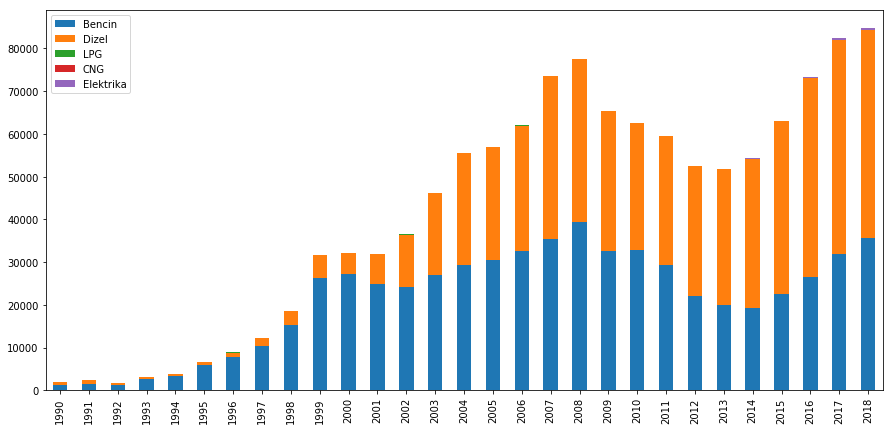

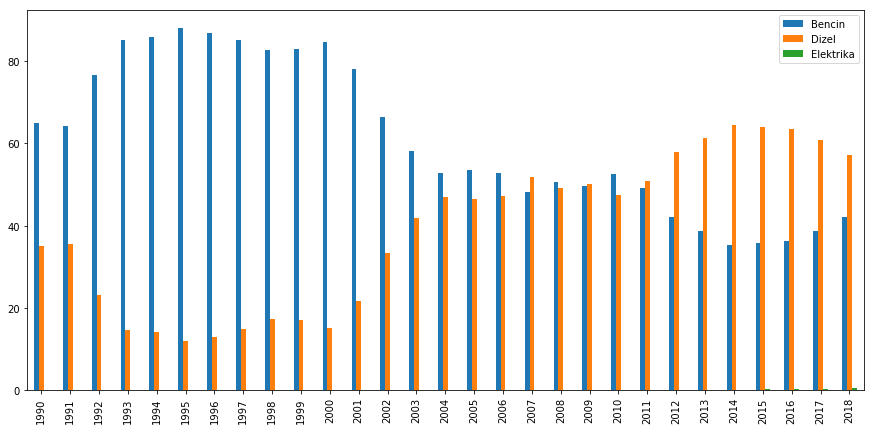

In [4]:
%store -r tipiMotorjevSkoziLeta

import pandas

dataSets = []
dataSetsPercent = []
columnNames = ["Bencin", "Dizel", "LPG", "CNG", "Elektrika"]
columnNamesPercent = ["Bencin", "Dizel", "Elektrika"]
xticksNew = []

for year in range(1990, 2019):
    dataSet = [0,0,0,0,0]
    suma = 0
    xticksNew.append(year)
    for typeOfFuel in tipiMotorjevSkoziLeta[str(year)]:
        suma = suma + tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
        if (typeOfFuel[0]=="P"):
            dataSet[0]=dataSet[0]+tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
        if (typeOfFuel[0]=="D"):
            dataSet[1]=dataSet[1]+tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
        if (typeOfFuel[0:3]=="LPG"):
            dataSet[2]=dataSet[2]+tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
        if(typeOfFuel[0:3]=="CNG"):
            dataSet[3]=dataSet[3]+tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
        if(typeOfFuel=="-"):
            dataSet[4]=dataSet[4]+tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
            
    
    dataSetsPercent.append([(dataSet[0]/suma)*100, 100*(dataSet[1]/suma),100*(dataSet[4]/suma)])
    dataSets.append(dataSet)
    
            
newTicks = pandas.Series(xticksNew)
df = pandas.DataFrame(dataSets, columns = columnNames, index=xticksNew)
dfPercent = pandas.DataFrame(dataSetsPercent, columns = columnNamesPercent, index=xticksNew)

df.plot.bar(stacked=True, figsize=(15,7))
dfPercent.plot.bar(stacked=False, figsize=(15,7))

### Zanimivosti - Dieselgate

**VOLKSWAGEN** že od leta 1964 dosega najboljše rezultate pri prodaji v Sloveniji. 
Od leta 2000 je v vodstvu sicer **RENAULT**, ampak **VOLKSWAGEN** mu tesno sledi.

## Zastava

Vsi poznamo avtomobil imenovan "fičo". Pa Yugo nam je tudi znan itd. Proizvajalec teh avtomobilov, Zastava, je bil nekaj časa zelo popularen. Potem pa je padel pol težo novih proizvajalcev. Poglejmo grafični prikaz.

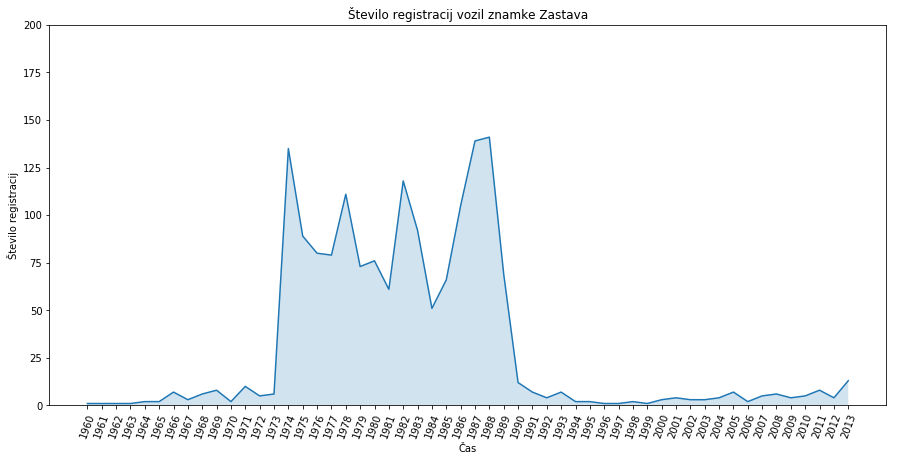

In [5]:
registracijeZastava = []
registracijeTotal = []
registracijeZastavaPercent = []
labels = []


for i in range(1960, 2019):
    labels.append(i)
    
    if (str(i) +" zima") in registracijeNaLeto and (str(i) +" poletje") in registracijeNaLeto and "ZASTAVA" in registracijeZnamkNaLeto[str(i)]:
        registracijeTotal.append(registracijeNaLeto[str(i) +" zima"]+registracijeNaLeto[str(i) +" poletje"])
        registracijeZastava.append(registracijeZnamkNaLeto[str(i)]["ZASTAVA"])  
        
        #print(str(i)+" "+str(registracijeZnamkNaLeto[str(i)]["ZASTAVA"]))
        registracijeZastavaPercent.append(registracijeZastava[-1]/registracijeTotal[-1])
        
index = np.arange(len(registracijeZastava))
plt.figure(figsize=(15,7))
plt.plot(index, registracijeZastava)

plt.title('Število registracij vozil znamke Zastava')
plt.xlabel('Čas', fontsize=10)
plt.ylabel('Število registracij', fontsize=10)

plt.ylim(top=200, bottom=0)
plt.xticks(index, labels, fontsize=10, rotation=70)
plt.fill_between(index, 0, registracijeZastava, alpha=0.2)

plt.show()

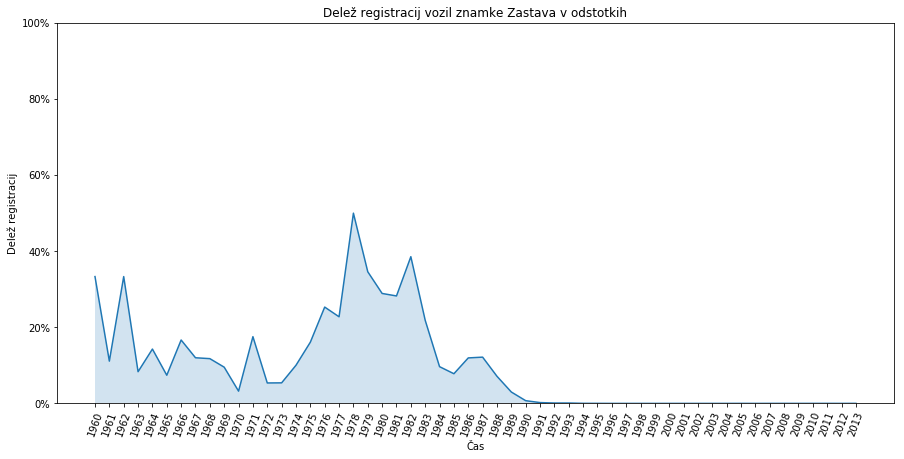

In [6]:
index = np.arange(len(registracijeZastavaPercent))
plt.figure(figsize=(15,7))
plt.plot(index, registracijeZastavaPercent)

plt.title('Delež registracij vozil znamke Zastava v odstotkih')
plt.xlabel('Čas', fontsize=10)
plt.ylabel('Delež registracij', fontsize=10)

plt.ylim(top=1,bottom=0)
plt.xticks(index, labels, fontsize=10, rotation=70)
plt.yticks(np.arange(0.00,1.01,0.2), ["0%", "20%","40%","60%","80%","100%"])
plt.fill_between(index, 0, registracijeZastavaPercent, alpha=0.2)
plt.show()

Napiši pojasnilo